# Dataset exploration style

In [1]:
#imports
import sys
sys.path.append('/home/elenaruiz/Documents/FNC')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import io
from src.fake_news_detector.core.nlp import clean_text as ct
from src.fake_news_detector.core.data_process import exploration as eh

## Import style dataset

In [2]:
articles = io.read_json_file('/home/elenaruiz/Documents/FNC/src/data/dataset_style.json')
df = pd.DataFrame(data=articles['articles'])

## Exploration

In [3]:
df.head()

,fake,mean_character_per_word,mean_noun_phrases,mean_words_per_sentence,n_quotes,n_sentences,n_words,pert_different_words,pert_total_adj,pert_total_conj_prep,pert_total_negative_words,pert_total_nouns,pert_total_positive_words,pert_total_verbs,sentiment,title_n_words,title_pert_total_conj_prep,title_pert_total_negative_words,title_pert_total_positive_words,title_sentiment
0,True,1.0,None,4.521569,None,7,255,0.486275,0.070588,0.011765,0.039216,0.356863,0.003922,0.160784,-0.417143,10,0.011765,0.100000,0.000000,-0.5719
1,True,1.0,None,4.840456,None,4,351,0.444444,0.082621,0.031339,0.019943,0.321937,0.014245,0.133903,-0.117700,12,0.031339,0.000000,0.000000,-0.1027
2,True,1.0,None,4.285106,None,11,235,0.553191,0.063830,0.017021,0.025532,0.310638,0.029787,0.148936,0.016064,14,0.017021,0.071429,0.000000,-0.4588
3,True,1.0,None,4.120000,None,5,125,0.600000,0.088000,0.040000,0.040000,0.272000,0.048000,0.240000,-0.148660,12,0.040000,0.083333,0.083333,-0.6202
4,True,1.0,None,4.536232,None,4,138,0.594203,0.072464,0.028986,0.036232,0.311594,0.028986,0.152174,-0.023350,12,0.028986,0.083333,0.000000,-0.4767


In [4]:
#ORIGINAL DATASET
fake_df = df.loc[df['fake'] == 1]
real_df = df.loc[df['fake'] == 0]


### Normalize

In [5]:
from sklearn.preprocessing import MinMaxScaler
names = df.columns
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:353: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:354: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


### General correlation

In [6]:
table = df.corr()
table[:1]

,fake,mean_character_per_word,mean_words_per_sentence,n_sentences,n_words,pert_different_words,pert_total_adj,pert_total_conj_prep,pert_total_negative_words,pert_total_nouns,pert_total_positive_words,pert_total_verbs,sentiment,title_n_words,title_pert_total_conj_prep,title_pert_total_negative_words,title_pert_total_positive_words,title_sentiment
fake,1.0,NaN,-0.379898,-0.087369,-0.271043,0.239972,0.025513,0.017846,0.178187,-0.359669,-0.030821,0.297955,-0.16611,0.259933,0.017846,0.194835,-0.088706,-0.230717


In [7]:
def print_results(labels, real_res, fake_res):
    print('FAKE NEWS')
    print(labels[0], 'Pert:', str(100*fake_res[0]))
    print(labels[1], 'Pert:', str(100*fake_res[1]))
    print(labels[2], 'Pert:', str(100*fake_res[2]))

    print('REAL NEWS')
    print(labels[0], 'Pert:', str(100*real_res[0]))
    print(labels[1], 'Pert:', str(100*real_res[1]))
    print(labels[2], 'Pert:', str(100*real_res[2]))

    print('DIFFERENCE NEWS')
    print(labels[0], str(100*(fake_res[0] - real_res[0])))
    print(labels[1], str(100*(fake_res[1] - real_res[1])))
    print(labels[2], str(100*(fake_res[2] - real_res[2])))

### Features to explore

1. mean_words_per_sentence
2. n_words
3. pert_different_words
4. pert_total_adj
5. pert_total_conj_prep
6. pert_total_nouns
7. pert_total_positive_words
8. pert_total_verbs
9. sentiment
10. title_sentiment

For each feature: 
- Explore histogram difference between real and fake
- Split in three levels
- See correlation with FAKE

### mean_words_per_sentence

/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


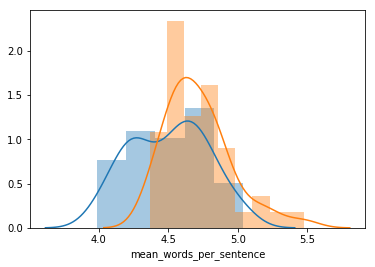

In [8]:
sns.distplot(fake_df['mean_words_per_sentence']);
sns.distplot(real_df['mean_words_per_sentence']);

In [9]:
fake, real = eh.split_in_three(fake_df['mean_words_per_sentence'], real_df['mean_words_per_sentence'])

labels = ['A lot', 'Middle', 'A bit']
print_results(labels, real, fake)


FAKE NEWS
A lot Pert: 11.11111111111111
Middle Pert: 75.55555555555556
A bit Pert: 13.333333333333334
REAL NEWS
A lot Pert: 5.357142857142857
Middle Pert: 51.78571428571429
A bit Pert: 42.857142857142854
DIFFERENCE NEWS
A lot 5.753968253968254
Middle 23.769841269841262
A bit -29.52380952380952


### n_words

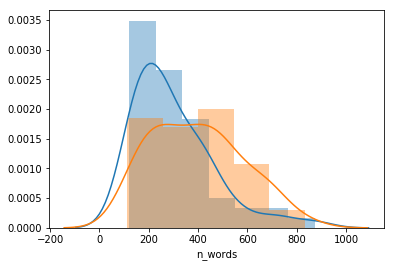

In [10]:
sns.distplot(fake_df['n_words']);
sns.distplot(real_df['n_words']);

In [11]:
fake, real = eh.split_in_three(fake_df['n_words'], real_df['n_words'])

labels = ['A lot', 'Middle', 'A bit']
print_results(labels, real, fake)

FAKE NEWS
A lot Pert: 15.555555555555555
Middle Pert: 37.77777777777778
A bit Pert: 46.666666666666664
REAL NEWS
A lot Pert: 5.357142857142857
Middle Pert: 23.214285714285715
A bit Pert: 71.42857142857143
DIFFERENCE NEWS
A lot 10.198412698412698
Middle 14.563492063492061
A bit -24.761904761904763


### pert_different_words

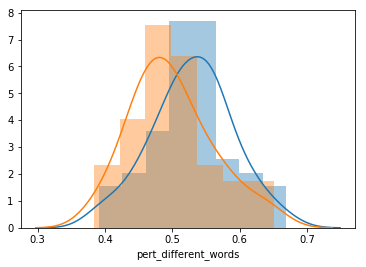

In [12]:
sns.distplot(fake_df['pert_different_words']);
sns.distplot(real_df['pert_different_words']);

In [13]:
fake, real = eh.split_in_three(fake_df['pert_different_words'], real_df['pert_different_words'])

labels = ['A lot', 'Middle', 'A bit']
print_results(labels, real, fake)

FAKE NEWS
A lot Pert: 13.333333333333334
Middle Pert: 44.44444444444444
A bit Pert: 42.22222222222222
REAL NEWS
A lot Pert: 17.857142857142858
Middle Pert: 62.5
A bit Pert: 19.642857142857142
DIFFERENCE NEWS
A lot -4.523809523809525
Middle -18.055555555555557
A bit 22.57936507936508


### pert_total_adj

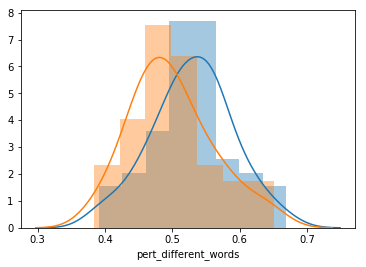

In [14]:
sns.distplot(fake_df['pert_different_words']);
sns.distplot(real_df['pert_different_words']);

In [15]:
fake, real = eh.split_in_three(fake_df['pert_total_adj'], real_df['pert_total_adj'])

labels = ['A lot', 'Middle', 'A bit']
print_results(labels, real, fake)

FAKE NEWS
A lot Pert: 24.444444444444443
Middle Pert: 62.22222222222222
A bit Pert: 13.333333333333334
REAL NEWS
A lot Pert: 26.785714285714285
Middle Pert: 60.71428571428571
A bit Pert: 12.5
DIFFERENCE NEWS
A lot -2.3412698412698414
Middle 1.5079365079365137
A bit 0.8333333333333331


### pert_total_conj_prep

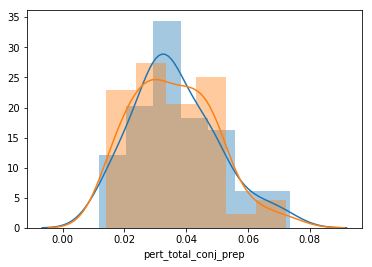

In [16]:
sns.distplot(fake_df['pert_total_conj_prep']);
sns.distplot(real_df['pert_total_conj_prep']);

In [17]:
fake, real = eh.split_in_three(fake_df['pert_total_conj_prep'], real_df['pert_total_conj_prep'])

labels = ['A lot', 'Middle', 'A bit']
print_results(labels, real, fake)

FAKE NEWS
A lot Pert: 6.666666666666667
Middle Pert: 48.888888888888886
A bit Pert: 44.44444444444444
REAL NEWS
A lot Pert: 10.714285714285714
Middle Pert: 44.642857142857146
A bit Pert: 44.642857142857146
DIFFERENCE NEWS
A lot -4.0476190476190474
Middle 4.246031746031742
A bit -0.19841269841270326


### pert_total_nouns

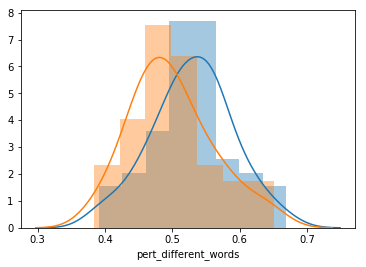

In [18]:
sns.distplot(fake_df['pert_different_words']);
sns.distplot(real_df['pert_different_words']);

In [19]:
fake, real = eh.split_in_three(fake_df['pert_total_nouns'], real_df['pert_total_nouns'])

labels = ['A lot', 'Middle', 'A bit']
print_results(labels, real, fake)

FAKE NEWS
A lot Pert: 31.11111111111111
Middle Pert: 51.11111111111111
A bit Pert: 17.77777777777778
REAL NEWS
A lot Pert: 8.928571428571429
Middle Pert: 53.57142857142857
A bit Pert: 37.5
DIFFERENCE NEWS
A lot 22.18253968253968
Middle -2.4603174603174627
A bit -19.72222222222222


### pert_total_positive_words

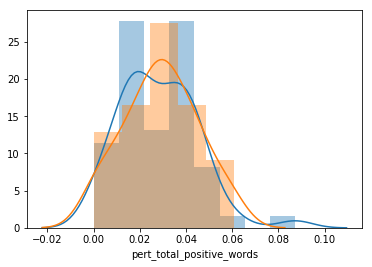

In [20]:
sns.distplot(fake_df['pert_total_positive_words']);
sns.distplot(real_df['pert_total_positive_words']);

In [21]:
fake, real = eh.split_in_three(fake_df['pert_total_positive_words'], real_df['pert_total_positive_words'])

labels = ['A lot', 'Middle', 'A bit']
print_results(labels, real, fake)

FAKE NEWS
A lot Pert: 4.444444444444445
Middle Pert: 46.666666666666664
A bit Pert: 48.888888888888886
REAL NEWS
A lot Pert: 3.571428571428571
Middle Pert: 44.642857142857146
A bit Pert: 51.78571428571429
DIFFERENCE NEWS
A lot 0.8730158730158734
Middle 2.023809523809522
A bit -2.8968253968254034


### pert_total_verbs

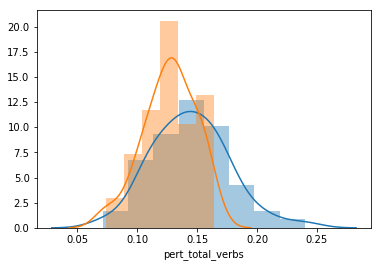

In [22]:
sns.distplot(fake_df['pert_total_verbs']);
sns.distplot(real_df['pert_total_verbs']);

In [23]:
fake, real = eh.split_in_three(fake_df['pert_total_verbs'], real_df['pert_total_verbs'])

labels = ['A lot', 'Middle', 'A bit']
print_results(labels, real, fake)

FAKE NEWS
A lot Pert: 0.0
Middle Pert: 53.333333333333336
A bit Pert: 46.666666666666664
REAL NEWS
A lot Pert: 7.142857142857142
Middle Pert: 62.5
A bit Pert: 30.357142857142854
DIFFERENCE NEWS
A lot -7.142857142857142
Middle -9.166666666666668
A bit 16.309523809523814


### pert_total_negative_words

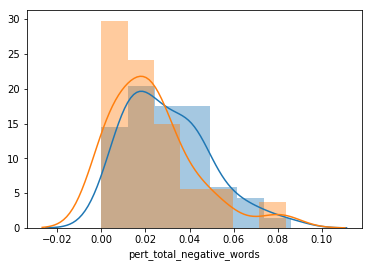

In [24]:
sns.distplot(fake_df['pert_total_negative_words']);
sns.distplot(real_df['pert_total_negative_words']);

In [25]:
fake, real = eh.split_in_three(fake_df['pert_total_negative_words'], real_df['pert_total_negative_words'])

labels = ['A lot', 'Middle', 'A bit']
print_results(labels, real, fake)

FAKE NEWS
A lot Pert: 6.666666666666667
Middle Pert: 22.22222222222222
A bit Pert: 71.11111111111111
REAL NEWS
A lot Pert: 8.928571428571429
Middle Pert: 39.285714285714285
A bit Pert: 51.78571428571429
DIFFERENCE NEWS
A lot -2.2619047619047623
Middle -17.063492063492063
A bit 19.325396825396822


## Correlations

In [26]:
df.corr()

,fake,mean_character_per_word,mean_words_per_sentence,n_sentences,n_words,pert_different_words,pert_total_adj,pert_total_conj_prep,pert_total_negative_words,pert_total_nouns,pert_total_positive_words,pert_total_verbs,sentiment,title_n_words,title_pert_total_conj_prep,title_pert_total_negative_words,title_pert_total_positive_words,title_sentiment
fake,1.000000,NaN,-0.379898,-0.087369,-0.271043,0.239972,0.025513,0.017846,0.178187,-0.359669,-0.030821,0.297955,-0.166110,0.259933,0.017846,0.194835,-0.088706,-0.230717
mean_character_per_word,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean_words_per_sentence,-0.379898,NaN,1.000000,-0.154040,0.071866,-0.014435,0.200452,-0.004495,-0.053067,0.571613,-0.011935,-0.490568,0.060527,0.109911,-0.004495,-0.125032,0.095996,0.050326
n_sentences,-0.087369,NaN,-0.154040,1.000000,0.717563,-0.492454,0.066816,0.086642,0.080100,-0.208889,0.059377,0.084855,0.068620,-0.211127,0.086642,0.032661,-0.131428,0.253294
n_words,-0.271043,NaN,0.071866,0.717563,1.000000,-0.786557,0.136001,0.205637,-0.005403,-0.067053,0.098769,-0.214100,0.178108,-0.174341,0.205637,-0.038724,-0.141562,0.168513
pert_different_words,0.239972,NaN,-0.014435,-0.492454,-0.786557,1.000000,0.064691,-0.029277,0.168824,0.045333,0.056719,0.124338,-0.156303,0.052674,-0.029277,0.064913,0.179024,-0.061443
pert_total_adj,0.025513,NaN,0.200452,0.066816,0.136001,0.064691,1.000000,0.113302,-0.104491,-0.242146,0.226168,-0.165203,0.218243,-0.195312,0.113302,-0.088334,0.175436,0.190006
pert_total_conj_prep,0.017846,NaN,-0.004495,0.086642,0.205637,-0.029277,0.113302,1.000000,0.137775,-0.228656,0.246994,0.085424,0.126395,0.010419,1.000000,0.225753,0.028787,-0.040575
pert_total_negative_words,0.178187,NaN,-0.053067,0.080100,-0.005403,0.168824,-0.104491,0.137775,1.000000,-0.059545,-0.120580,0.216039,-0.697090,0.070261,0.137775,0.548711,-0.029743,-0.424340
pert_total_nouns,-0.359669,NaN,0.571613,-0.208889,-0.067053,0.045333,-0.242146,-0.228656,-0.059545,1.000000,-0.045993,-0.704646,-0.011733,0.169113,-0.228656,-0.115841,0.181456,0.038905


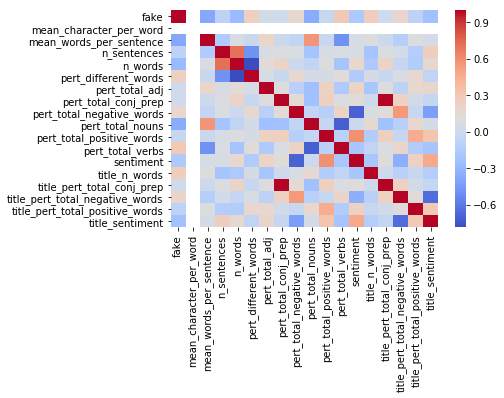

In [27]:
sns.heatmap(df.corr(), cmap='coolwarm')